In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap 
import json 
import xgboost
import seaborn as sns
import math

/Users/daniel/Documents/masters_ai/thesis/graphworld/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def df_gen(RESULTS_DIR, NSHARDS = 10):  
  dfs = []
  for shard_idx in range(NSHARDS):
    filename = 'results.ndjson-%s-of-%s' % (str(shard_idx).zfill(5), str(NSHARDS).zfill(5))
    print(filename)

    with open(f'{RESULTS_DIR}/{filename}', 'r') as f:
      lines = f.readlines()
      records = map(json.loads, lines)
      dfs.append(pd.DataFrame.from_records(records))

  # Construct df and remove nans
  results_df = pd.concat(dfs)
  results_df.drop(['marginal_param', 'fixed_params'], axis=1, inplace=True)
  # results_df.dropna(axis=0, inplace=True)
  del dfs
  return results_df

In [3]:
NSHARDS = 10
models = ['MLP', 'GCN']
RESULTS_DIR = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm'
RESULTS_DIR1 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/1'
RESULTS_DIR2 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/2'
RESULTS_DIR3 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/3'
RESULTS_DIR4 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/4'
RESULTS_DIR5 = '../../graph_gen/snellius_gen/sample_gen/test_noise_no_norm/test_noise_no_norm/5'

df = df_gen(RESULTS_DIR, NSHARDS)
df1 = df_gen(RESULTS_DIR1, NSHARDS)
df2 = df_gen(RESULTS_DIR2, NSHARDS)
df3 = df_gen(RESULTS_DIR3, NSHARDS)
df4 = df_gen(RESULTS_DIR4, NSHARDS)
df5 = df_gen(RESULTS_DIR5, NSHARDS)


df = pd.concat([df, df1, df2, df3, df4, df5], axis = 0)
df = df.reset_index(drop=True)
df

results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010
results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010
results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.ndjson-00003-of-00010
results.ndjson-00004-of-00010
results.ndjson-00005-of-00010
results.ndjson-00006-of-00010
results.ndjson-00007-of-00010
results.ndjson-00008-of-00010
results.ndjson-00009-of-00010
results.ndjson-00000-of-00010
results.ndjson-00001-of-00010
results.ndjson-00002-of-00010
results.nd

,nvertex,avg_degree,feature_center_distance,feature_dim,edge_center_distance,edge_feature_dim,p_to_q_ratio,num_clusters,cluster_size_slope,power_exponent,...,MLP__test_logloss,MLP__model_dropout,MLP__model_hidden_channels,MLP__model_in_channels,MLP__model_lr,MLP__model_num_layers,MLP__model_weight_decay,MLP__model_out_channels,MLP__train_epochs,MLP__train_patience
0,1352,9.562289,0.390386,16,1.0,1,13.464975,7,0.588315,0.607698,...,1.915104,0.6,16,32,0.0010,1,0.0001,7,200,15
1,1359,13.115789,1.715084,16,1.0,1,14.082951,7,0.333200,1.771090,...,1.759299,0.4,32,32,0.0020,2,0.0005,7,200,15
2,3530,4.380339,0.683335,16,1.0,1,12.749049,8,0.792320,1.960316,...,2.054621,0.4,16,32,0.0020,1,0.0001,8,200,15
3,3551,18.522669,0.491903,16,1.0,1,4.927547,7,0.447886,2.618927,...,1.900633,0.6,32,32,0.0005,1,0.0000,7,200,15
4,2919,16.854589,0.967202,16,1.0,1,14.667087,7,0.185181,2.227018,...,1.795015,0.4,16,32,0.0010,1,0.0010,7,200,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3609,8.031199,0.284539,16,1.0,1,6.456280,2,0.305609,0.407720,...,0.690681,0.4,16,32,0.0020,2,0.0000,2,200,15
4996,1056,13.282520,0.176616,16,1.0,1,2.358084,7,0.430003,0.751247,...,1.932516,0.2,8,32,0.0005,3,0.0005,7,200,15
4997,3578,7.994299,1.955615,16,1.0,1,9.699010,8,0.229193,0.995935,...,2.082255,0.6,16,32,0.0020,3,0.0001,8,200,15
4998,1191,13.736746,0.603972,16,1.0,1,14.052332,9,0.507515,0.841346,...,2.150609,0.6,32,32,0.0020,2,0.0005,9,200,15


In [4]:
perf_meas = "test_rocauc_ovr"
df['perf_delta'] = df[f'GCN__{perf_meas}']-df[f'MLP__{perf_meas}']

graph_metrics_refined = ['nvertex', 'avg_degree', 'degree_gini', 'p_to_q_ratio',
                 'num_clusters', 'community_size_simpsons', 'feature_center_distance',
                 'avg_cc']

graph_metrics_computable = ['nvertex', 'avg_degree', 'degree_gini', 'edge_homogeneity',
                 'num_clusters', 'community_size_simpsons', 'feature_angular_snr',
                 'avg_cc']

graph_metrics = ['nvertex', 'avg_degree', 'feature_center_distance',
       'p_to_q_ratio','num_clusters', 'cluster_size_slope', 'power_exponent', 'min_deg',
       'num_nodes', 'num_edges', 'edge_density',
       'degree_gini', 'coreness_eq_1',
       'coreness_geq_2', 'coreness_geq_5', 'coreness_geq_10', 'coreness_gini',
       'avg_cc', 'transitivity', 'num_triangles', 'cc_size',
       'power_law_estimate', 'edge_homogeneity',
       'avg_in_feature_angular_distance', 'avg_out_feature_angular_distance',
       'feature_angular_snr', 'pareto_exponent', 'avg_degree_est',
       'community_size_simpsons', 'p_to_q_ratio_est', 'p_to_q_ratio__est_dc']

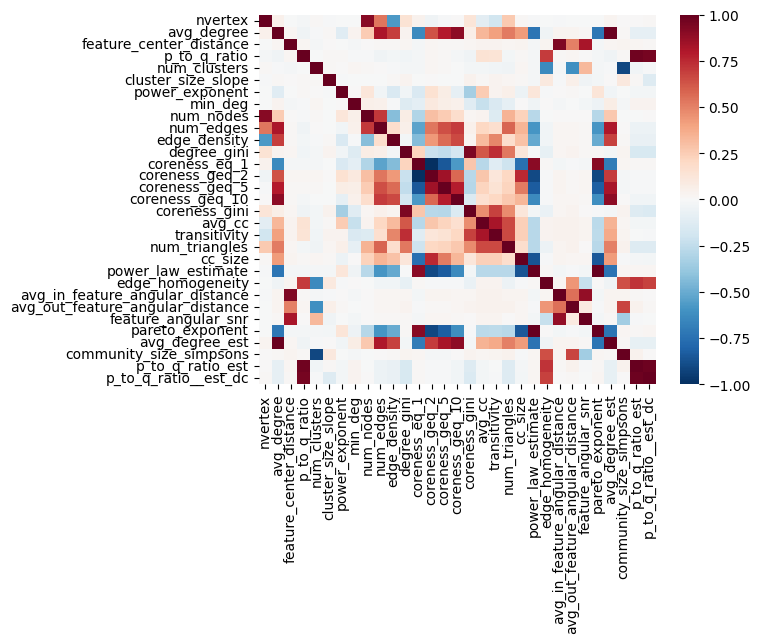

In [6]:
sns.heatmap(df[graph_metrics].corr(),
            yticklabels=True,
            xticklabels=True,
            cmap="RdBu_r")
plt.show()

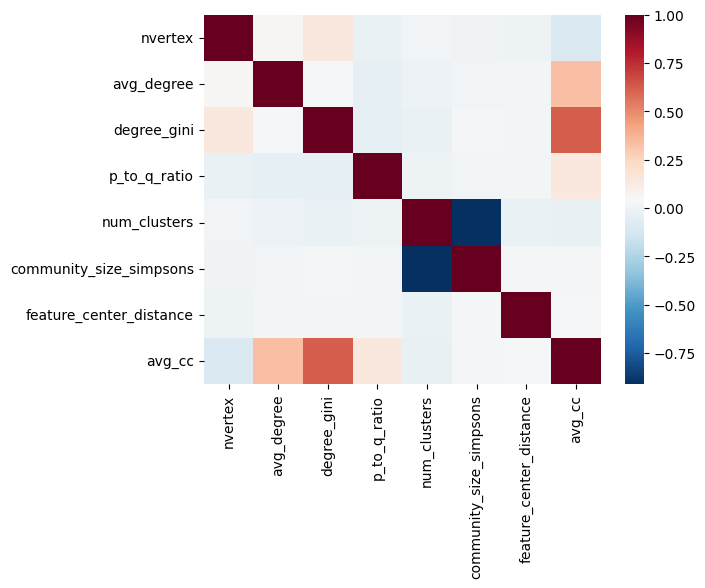

In [5]:
sns.heatmap(df[graph_metrics_refined].corr(),
            yticklabels=True,
            xticklabels=True,
            cmap="RdBu_r")
plt.show()

In [7]:
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np
import pandas as pd
import scipy.stats as st

# --- 0.  Prepare data --------------------------------------------------------
predictor_features = graph_metrics_computable
X = df[predictor_features].copy()

if 'perf_delta' not in df.columns:
    df['perf_delta'] = (
        df['GCN__test_rocauc_ovr'] - df['MLP__test_rocauc_ovr']
    )
y = df['perf_delta'].values

# --- 1.  Base regressor & (optional) hyper‑parameter grid --------------------
xgb_base = xgb.XGBRegressor(
    objective       ='reg:squarederror',
    n_estimators    =1000,
    random_state    =42,
    n_jobs          =-1,
)

param_grid = {              # ↪ expand or comment out entirely
    "max_depth":      [3, 5, 7],
    "learning_rate":  [0.01, 0.05, 0.1],
    "subsample":      [0.8],
    "colsample_bytree":[0.8],
}

inner = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,                   # 3‑fold inner CV for tuning
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# --- 2.  Outer CV for unbiased performance -----------------------------------
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring = {
    "r2":  make_scorer(r2_score),
    "rmse":make_scorer(
        lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        greater_is_better=False),                 # negative values inside CV
}

cv_results = cross_validate(
    inner, X, y,
    cv=kf,
    scoring=scoring,
    return_estimator=False,
    n_jobs=-1,
)

r2_scores   =  cv_results["test_r2"]
rmse_scores = -cv_results["test_rmse"]           # flip sign back to positive

# --- 3.  95 % confidence intervals -------------------------------------------
def t_interval(array, conf=0.95):
    mean = array.mean()
    se   = array.std(ddof=1) / np.sqrt(len(array))
    h    = se * st.t.ppf((1 + conf) / 2, len(array) - 1)
    return mean, mean - h, mean + h

r2_mean,   r2_low,   r2_high   = t_interval(r2_scores)
rmse_mean, rmse_low, rmse_high = t_interval(rmse_scores)

print(f"10‑fold CV R²   : {r2_mean: .3f}  (95 % CI {r2_low:.3f} – {r2_high:.3f})")
print(f"10‑fold CV RMSE : {rmse_mean:.3f}  (95 % CI {rmse_low:.3f} – {rmse_high:.3f})")

10‑fold CV R²   :  0.586  (95 % CI 0.565 – 0.608)
10‑fold CV RMSE : 0.108  (95 % CI 0.105 – 0.111)


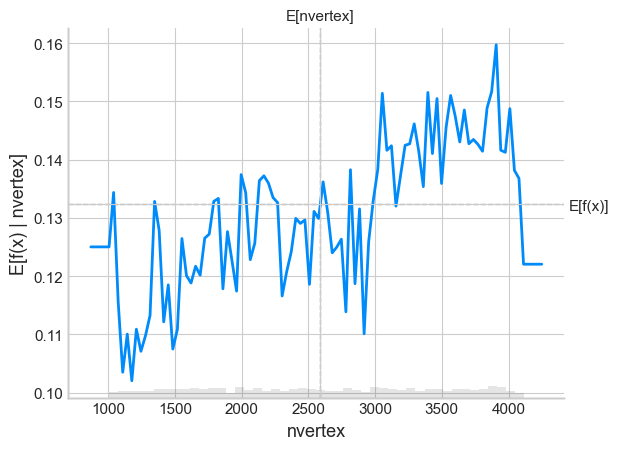

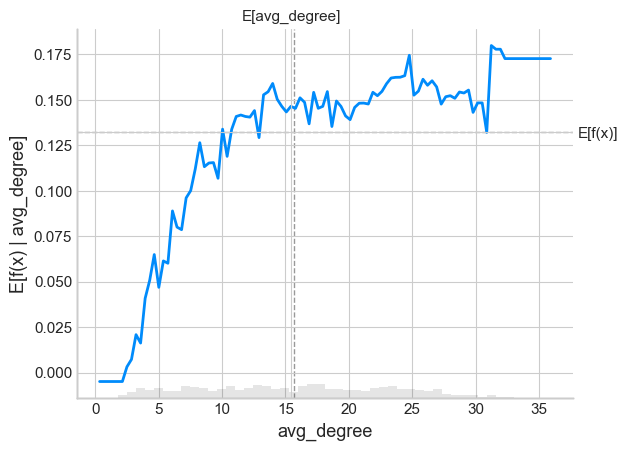

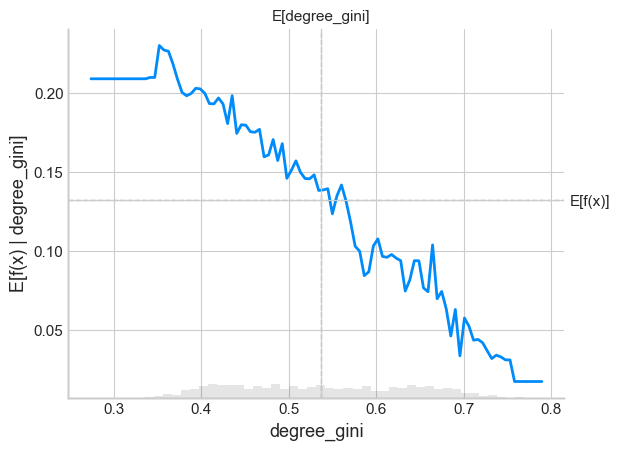

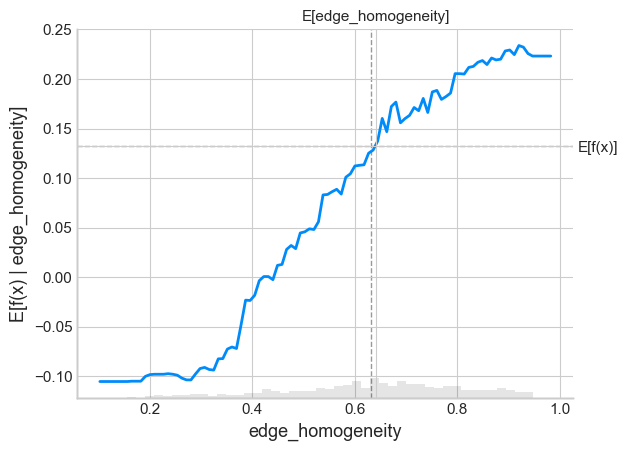

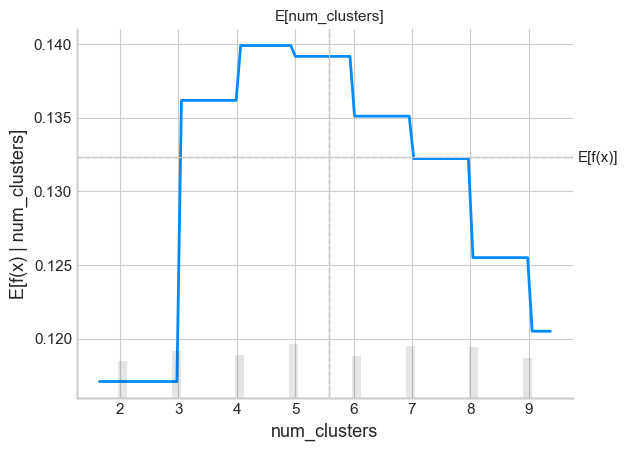

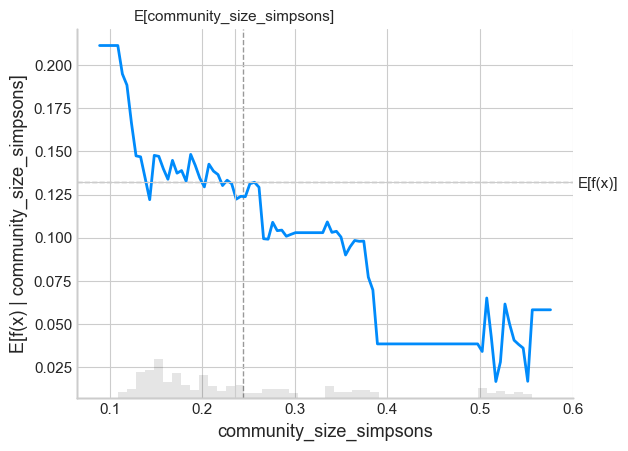

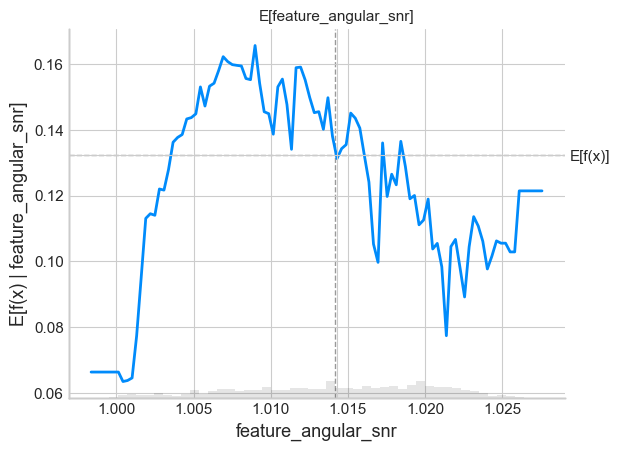

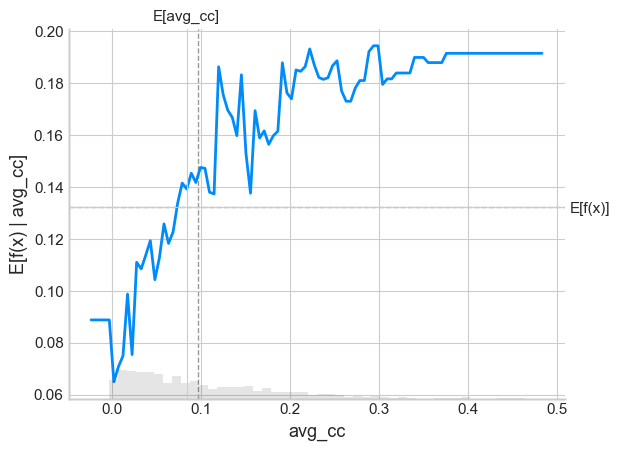

In [48]:
for m in graph_metrics_computable:
    fig, ax = shap.partial_dependence_plot(
        m,
        xgbr.predict,
        X_test,
        model_expected_value=True,
        feature_expected_value=True,
        show=False,
        ice=False,
    )

In [8]:

# --- Step 1: Create the SHAP Explainer and Calculate Values ---
print("\nCalculating SHAP values...")
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
print("SHAP values calculated.")

# --- Step 2: Generate a Grid of Dependence Plots ---
print("\nGenerating grid of SHAP dependence plots...")

# Get the list of feature names
features = X_test.columns
n_features = len(features)

# Set up the subplot grid
# Let's aim for 3 columns
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    # Create the dependence plot on the specified subplot axis
    # We set interaction_index=None to get a "pure" dependence plot without auto-coloring
    shap.dependence_plot(
        feature,
        shap_values,
        X_test,
        ax=ax,
        show=False,
        # interaction_index="feature_center_distance"
    )
    ax.set_title(f'Dependence Plot for {feature}', fontsize=12)
    ax.grid(True)

# Hide any unused subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
# Save the comprehensive figure for your thesis
plt.savefig('shap_dependence_grid.png', dpi=300, bbox_inches='tight')
plt.show()


Calculating SHAP values...


NameError: name 'xgbr' is not defined

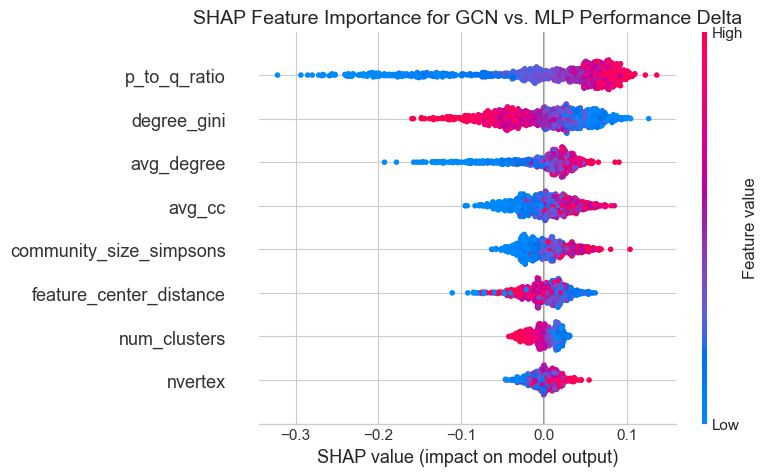

In [42]:
# This is the primary visualization for SHAP feature importance.
shap.summary_plot(
    shap_values,
    X_test,
    show=False
)
plt.title('SHAP Feature Importance for GCN vs. MLP Performance Delta', fontsize=14)
# Save the figure for your thesis
# plt.savefig('shap_beeswarm_importance.png', dpi=300, bbox_inches='tight')
plt.show()

## Pivot to testing on real-world graphs